In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [260]:
# The file we are trying to read is not encoded in the expected 'utf-8' format. This often happens with CSV files created on different operating systems or with different software.
# We will try reading the file with the 'latin-1' encoding, which is a common alternative for this type of issue.

df = pd.read_csv('https://raw.githubusercontent.com/vineethpetnakota/Super_store_dataset/main/Sample%20-%20Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [261]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [262]:
df.shape

(9994, 21)

In [263]:
print(df.duplicated().sum())

0


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

#**1. Data Cleaning & Preparation**

In [265]:
# Convert Order Date & Ship Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [266]:
# Extract Year, Month, Quarter for time-series analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter

In [267]:
# Calculate delivery time (in days)
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [268]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [269]:
df.Country.unique()

array(['United States'], dtype=object)

In [270]:
# Check for missing values
print("\nMissing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Year       0
Order Month      0
Order Quarter    0
Delivery Days    0
dtype: int64


In [271]:
# Check for outliers in key metrics
print("\nDescriptive Stats for Sales, Profit, Discount:\n")
print(df[['Sales', 'Profit', 'Discount']].describe())


Descriptive Stats for Sales, Profit, Discount:

              Sales       Profit     Discount
count   9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     0.156203
std      623.245101   234.260108     0.206452
min        0.444000 -6599.978000     0.000000
25%       17.280000     1.728750     0.000000
50%       54.490000     8.666500     0.200000
75%      209.940000    29.364000     0.200000
max    22638.480000  8399.976000     0.800000


In [272]:
# Delivery Days summary
print("\nDelivery Days range:", (df['Delivery Days'].min(), df['Delivery Days'].max()))


Delivery Days range: (0, 7)


In [273]:
# Check datatypes after conversion
print("\nData Types after Cleaning:\n", df.dtypes)


Data Types after Cleaning:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Order Year                int32
Order Month               int32
Order Quarter             int32
Delivery Days             int64
dtype: object


#**2. Exploratory Data Analysis (EDA)**


**A. Descriptive Statistics**

In [274]:
# Basic dataset overview
print("Total Rows:", len(df))
print("Total Unique Customers:", df['Customer ID'].nunique())
print("Total Unique Products:", df['Product ID'].nunique())
print("Total Unique Orders:", df['Order ID'].nunique())

Total Rows: 9994
Total Unique Customers: 793
Total Unique Products: 1862
Total Unique Orders: 5009


In [275]:
from IPython.display import display, HTML

# Overall financial metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()
avg_discount = df['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100  # %

display(HTML("<h3 style='color: blue;'>Overall Business Metrics</h3>"))
print(f"\nTotal Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Average Discount: {avg_discount:.2%}")
print(f"Overall Profit Margin: {profit_margin:.2f}%")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37873
Average Discount: 15.62%
Overall Profit Margin: 12.47%


**B. Customer & Segment Insights**

In [276]:
# Segment-wise summary
segment_summary = df.groupby('Segment').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Total_Quantity=('Quantity', 'sum'),
    Avg_Discount=('Discount', 'mean')
).round(2).reset_index()

display(HTML("<h3 style='color: blue;'>Segment-wise Summary</h3>"),segment_summary)

,Segment,Total_Sales,Total_Profit,Total_Quantity,Avg_Discount
0,Consumer,1161401.34,134119.21,19521,0.16
1,Corporate,706146.37,91979.13,11608,0.16
2,Home Office,429653.15,60298.68,6744,0.15


<Figure size 800x500 with 0 Axes>

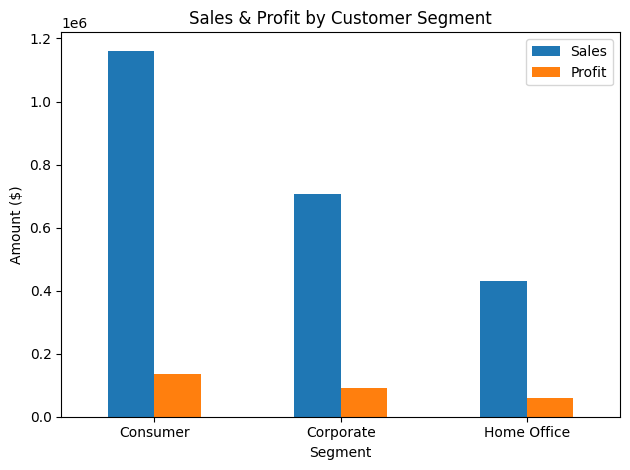

In [277]:
# Segment-wise Sales & Profit (Visual)
segment_sales_profit = df.groupby('Segment')[['Sales','Profit']].sum().sort_values('Sales', ascending=False)
plt.figure(figsize=(8,5))
segment_sales_profit[['Sales','Profit']].plot(kind='bar')
plt.title("Sales & Profit by Customer Segment")
plt.ylabel("Amount ($)")
plt.xlabel("Segment")
plt.legend(["Sales","Profit"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [278]:
# Category-wise summary
category_summary = df.groupby('Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Total_Quantity=('Quantity', 'sum'),
    Avg_Discount=('Discount', 'mean')
).round(2).reset_index()

display(HTML("<h3 style='color: blue;'>--- Category-wise Summary ---</h3>"),category_summary)

,Category,Total_Sales,Total_Profit,Total_Quantity,Avg_Discount
0,Furniture,741999.80,18451.27,8028,0.17
1,Office Supplies,719047.03,122490.80,22906,0.16
2,Technology,836154.03,145454.95,6939,0.13


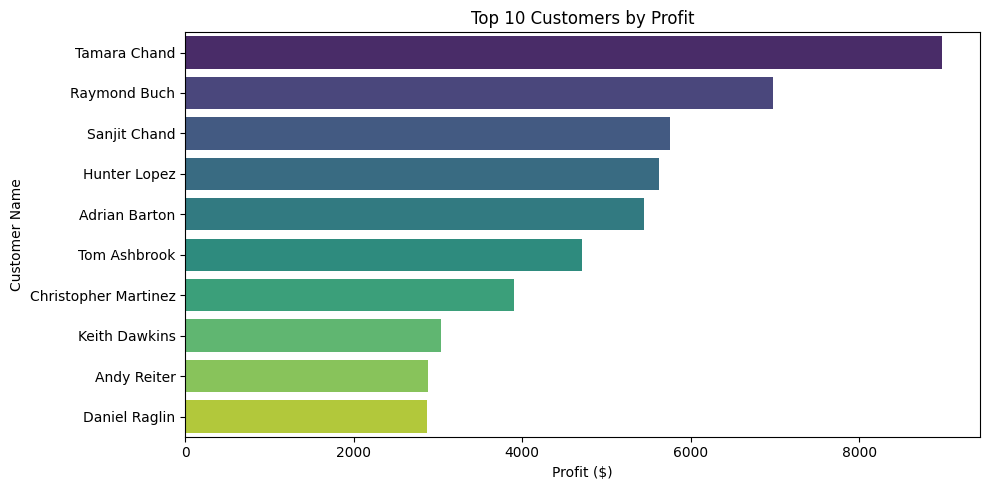

In [279]:
# Top 10 Customers by Profit (Visual)

plt.figure(figsize=(10,5))
sns.barplot(x='Total_Profit', y='Customer Name', data=top_customers, palette='viridis')
plt.title("Top 10 Customers by Profit")
plt.xlabel("Profit ($)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

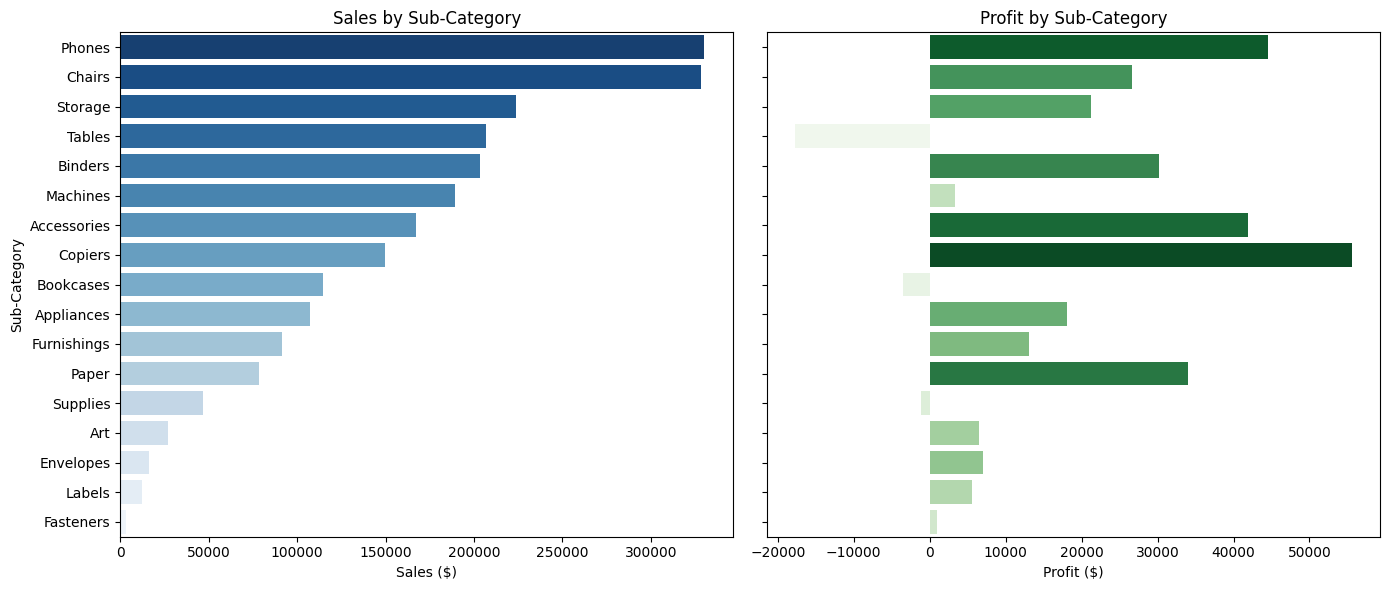

In [280]:
# Sub-Category Wise Sales & Profit
subcat_summary = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values('Sales', ascending=False).reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Sales subplot
sns.barplot(x='Sales', y='Sub-Category', data=subcat_summary, palette='Blues_r', ax=axes[0])
axes[0].set_title("Sales by Sub-Category")
axes[0].set_xlabel("Sales ($)")
axes[0].set_ylabel("Sub-Category")

# Profit subplot
sns.barplot(x='Profit', y='Sub-Category', data=subcat_summary.sort_values('Profit', ascending=False), palette='Greens_r', ax=axes[1])
axes[1].set_title("Profit by Sub-Category")
axes[1].set_xlabel("Profit ($)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**C. Product Insights**

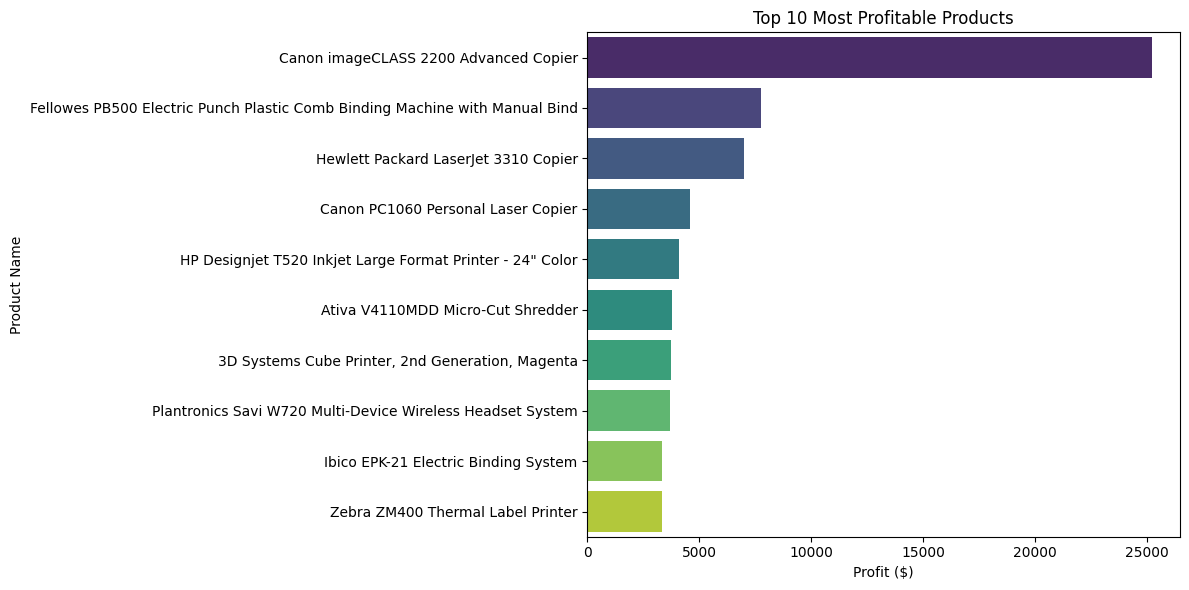

In [281]:
# Top 10 Most Profitable Products
top_products = df.groupby('Product Name').agg(
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum')
).sort_values(by='Total_Profit', ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Total_Profit', y='Product Name', data=top_products, palette='viridis')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

**D. Regional & Geographic Insights**

In [282]:
# Region-wise Sales & Profit
region_summary = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).round(2).reset_index().sort_values('Total_Sales', ascending=False)

display(HTML("<h3 style='color: red;'>Region-wise Summary</h3>"),region_summary)


,Region,Total_Sales,Total_Profit
3,West,725457.82,108418.45
1,East,678781.24,91522.78
0,Central,501239.89,39706.36
2,South,391721.90,46749.43


In [283]:
# State-wise Sales & Profit
state_summary = df.groupby('State').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).round(2).reset_index().sort_values('Total_Sales', ascending=False)
display(HTML("<h3 style='color: red;'>State-wise Summary (Top 10 by Sales)</h3>"),state_summary.head(10))

,State,Total_Sales,Total_Profit
3,California,457687.63,76381.39
30,New York,310876.27,74038.55
41,Texas,170188.05,-25729.36
45,Washington,138641.27,33402.65
36,Pennsylvania,116511.91,-15559.96
8,Florida,89473.71,-3399.30
11,Illinois,80166.10,-12607.89
33,Ohio,78258.14,-16971.38
20,Michigan,76269.61,24463.19
44,Virginia,70636.72,18597.95


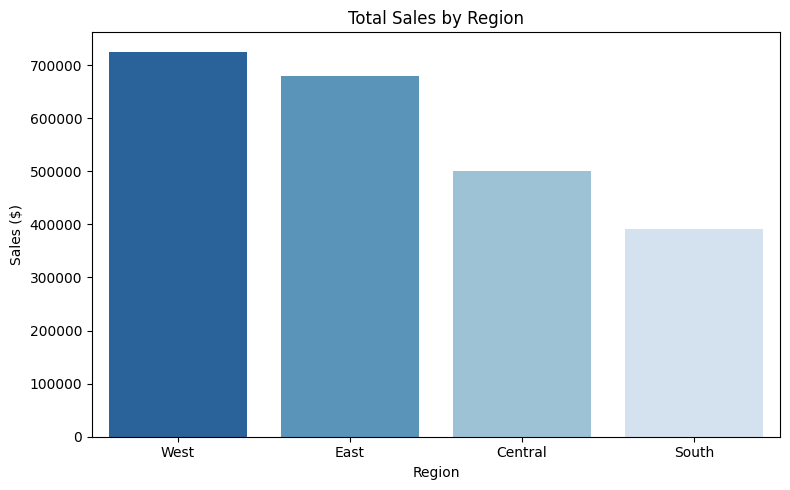

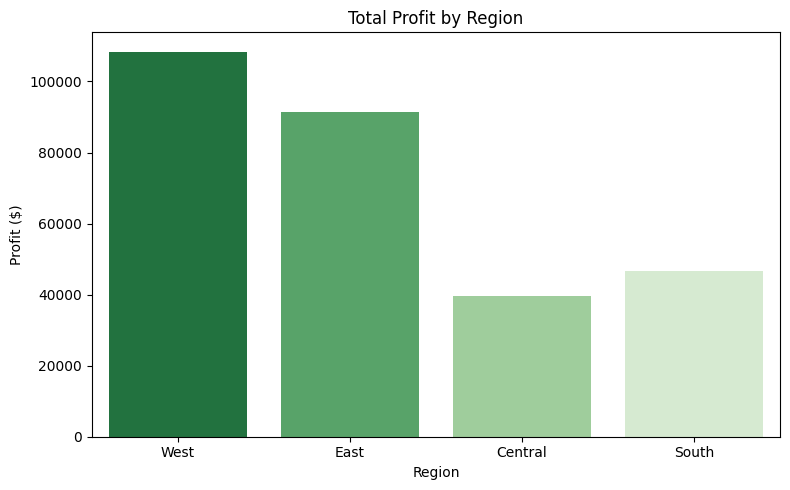

In [284]:
# Bar Chart - Region-wise Sales & Profit
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Sales', data=region_summary, palette='Blues_r')
plt.title("Total Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Profit', data=region_summary, palette='Greens_r')
plt.title("Total Profit by Region")
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

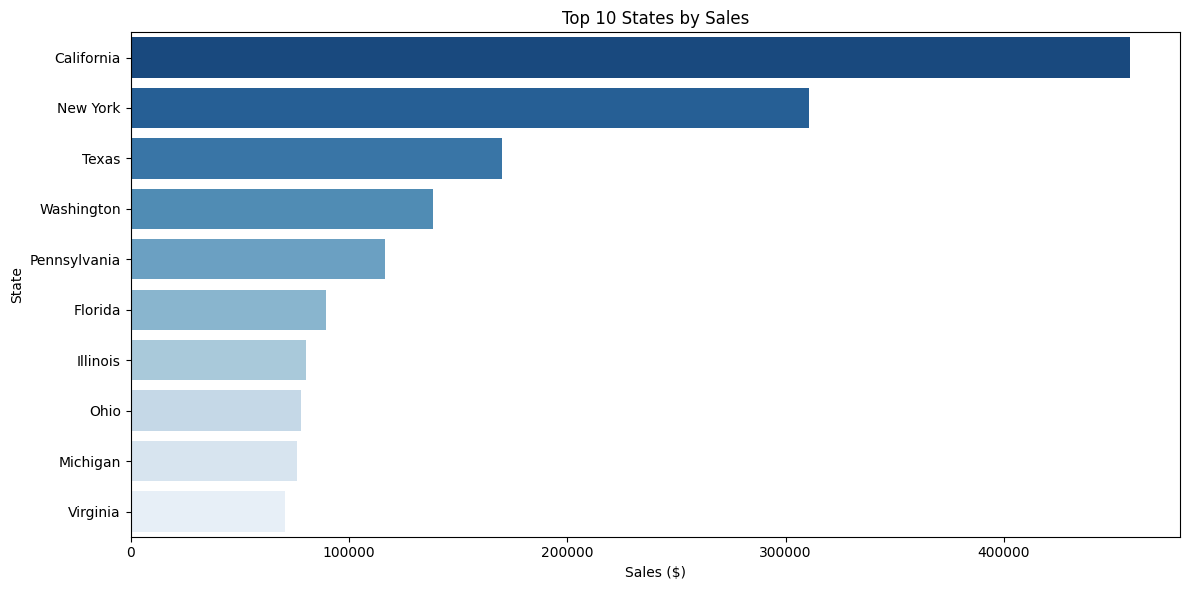

In [285]:
# 2. Top 10 States by Sales
top_states = state_summary.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Total_Sales', y='State', data=top_states, palette='Blues_r')
plt.title("Top 10 States by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

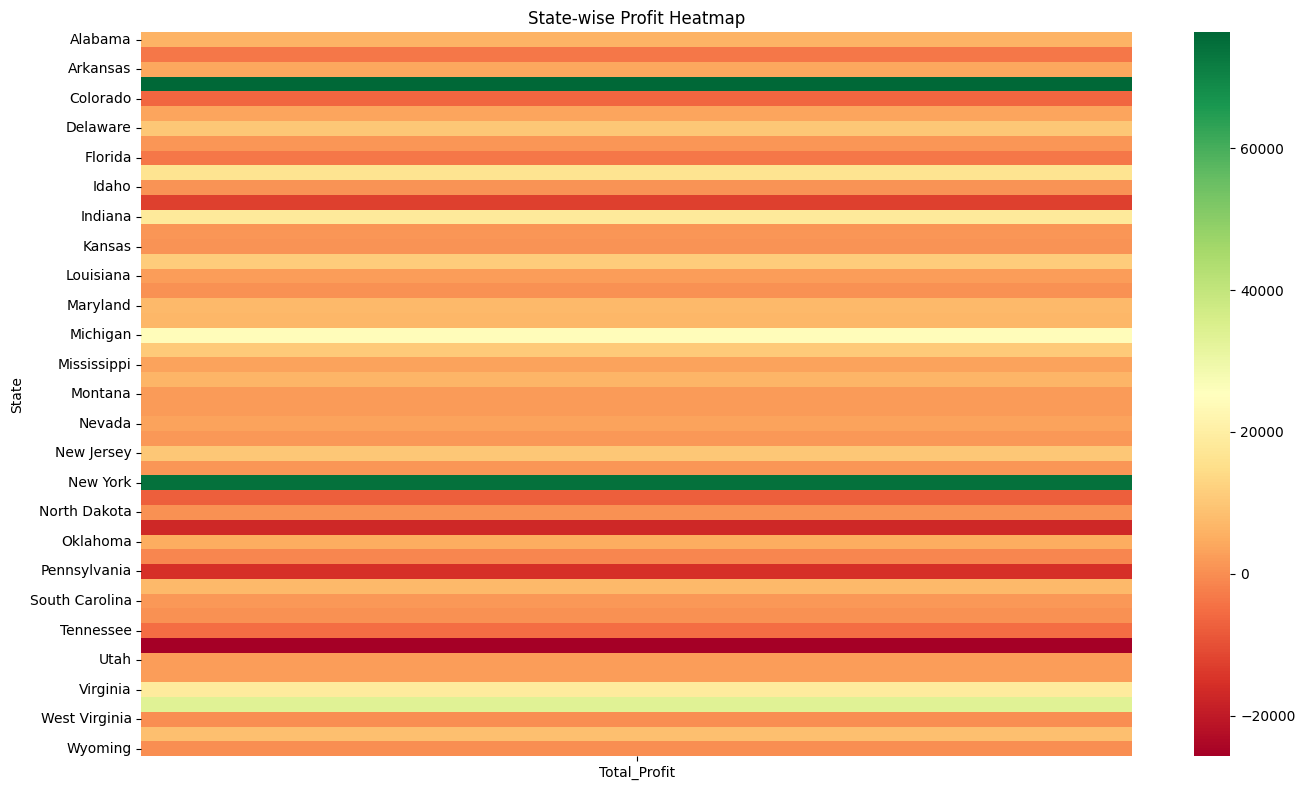

In [286]:
# 3. Heatmap - State vs Profit (for better visual understanding)
plt.figure(figsize=(14,8))
state_pivot = state_summary.pivot_table(index='State', values='Total_Profit')
sns.heatmap(state_pivot, cmap='RdYlGn', annot=False)
plt.title("State-wise Profit Heatmap")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [287]:
# Ship Mode: Sales, Profit & Delivery Days
shipmode_summary = df.groupby('Ship Mode').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Delivery_Days=('Delivery Days', 'mean')
).round(2).reset_index().sort_values('Total_Sales', ascending=False)

print("\n--- Ship Mode Summary ---\n", shipmode_summary)


--- Ship Mode Summary ---
         Ship Mode  Total_Sales  Total_Profit  Avg_Delivery_Days
3  Standard Class   1358215.74     164088.79               5.01
2    Second Class    459193.57      57446.64               3.24
0     First Class    351428.42      48969.84               2.18
1        Same Day    128363.12      15891.76               0.04


In [288]:
# Delivery Days Distribution
delivery_days_stats = df['Delivery Days'].describe()
print("\n--- Delivery Days Summary ---\n", delivery_days_stats)


--- Delivery Days Summary ---
 count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Delivery Days, dtype: float64


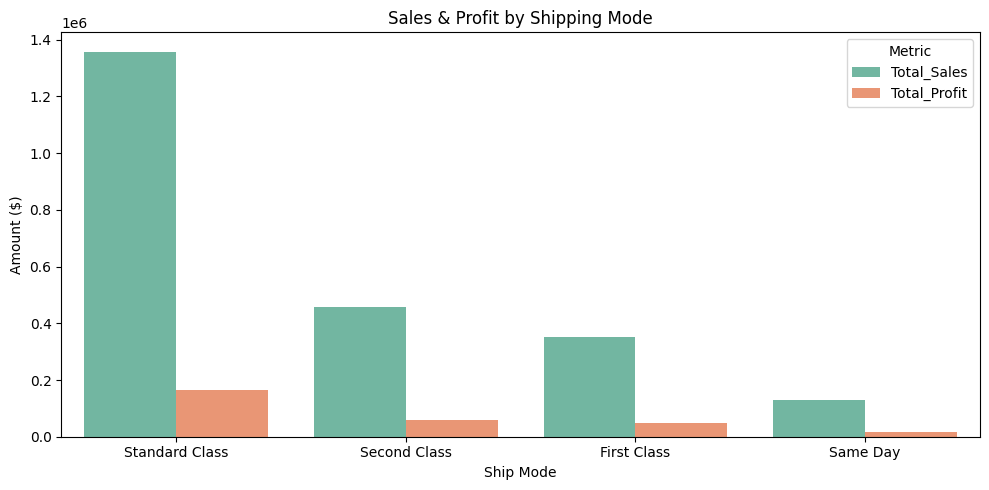

In [289]:
# Ship Mode vs Sales & Profit
plt.figure(figsize=(10,5))
shipmode_summary_melt = shipmode_summary.melt(id_vars='Ship Mode', value_vars=['Total_Sales','Total_Profit'], var_name='Metric', value_name='Value')
sns.barplot(x='Ship Mode', y='Value', hue='Metric', data=shipmode_summary_melt, palette='Set2')
plt.title("Sales & Profit by Shipping Mode")
plt.ylabel("Amount ($)")
plt.xlabel("Ship Mode")
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

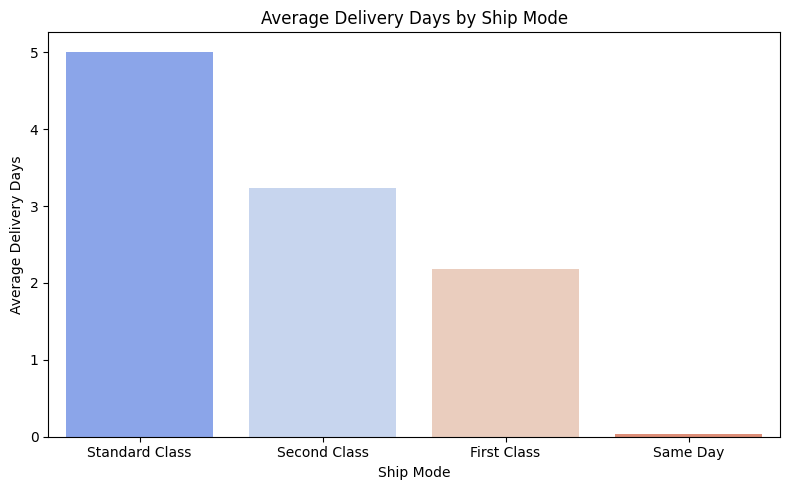

In [290]:
# Average Delivery Days by Ship Mode
plt.figure(figsize=(8,5))
sns.barplot(x='Ship Mode', y='Avg_Delivery_Days', data=shipmode_summary, palette='coolwarm')
plt.title("Average Delivery Days by Ship Mode")
plt.ylabel("Average Delivery Days")
plt.xlabel("Ship Mode")
plt.tight_layout()
plt.show()

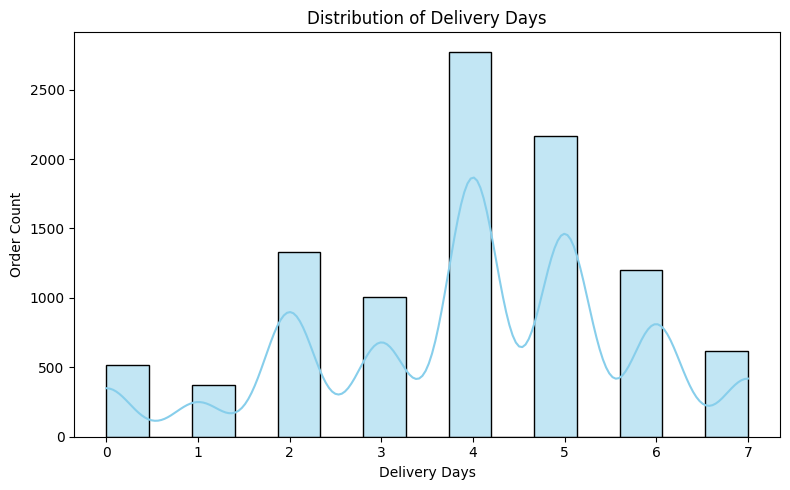

In [291]:
# Delivery Days Distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery Days'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

In [292]:
# Monthly Sales & Profit Trends
monthly_trends = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg(
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum')
).reset_index()

# Extract Year-Month for better labeling
monthly_trends['Year-Month'] = monthly_trends['Order Date'].dt.strftime('%Y-%m')

print("\n--- Monthly Trends ---\n", monthly_trends)


--- Monthly Trends ---
    Order Date  Total_Sales  Total_Profit Year-Month
0  2014-01-31   14236.8950     2450.1907    2014-01
1  2014-02-28    4519.8920      862.3084    2014-02
2  2014-03-31   55691.0090      498.7299    2014-03
3  2014-04-30   28295.3450     3488.8352    2014-04
4  2014-05-31   23648.2870     2738.7096    2014-05
5  2014-06-30   34595.1276     4976.5244    2014-06
6  2014-07-31   33946.3930     -841.4826    2014-07
7  2014-08-31   27909.4685     5318.1050    2014-08
8  2014-09-30   81777.3508     8328.0994    2014-09
9  2014-10-31   31453.3930     3448.2573    2014-10
10 2014-11-30   78628.7167     9292.1269    2014-11
11 2014-12-31   69545.6205     8983.5699    2014-12
12 2015-01-31   18174.0756    -3281.0070    2015-01
13 2015-02-28   11951.4110     2813.8508    2015-02
14 2015-03-31   38726.2520     9732.0978    2015-03
15 2015-04-30   34195.2085     4187.4962    2015-04
16 2015-05-31   30131.6865     4667.8690    2015-05
17 2015-06-30   24797.2920     3335.557

In [293]:
# Yearly Sales & Profit Trends
yearly_trends = df.groupby(df['Order Date'].dt.year).agg(
    Total_Sales=('Sales','sum'),
    Total_Profit=('Profit','sum')
).reset_index().rename(columns={'Order Date':'Year'})

print("\n--- Yearly Trends ---\n", yearly_trends)


--- Yearly Trends ---
    Year  Total_Sales  Total_Profit
0  2014  484247.4981    49543.9741
1  2015  470532.5090    61618.6037
2  2016  609205.5980    81795.1743
3  2017  733215.2552    93439.2696


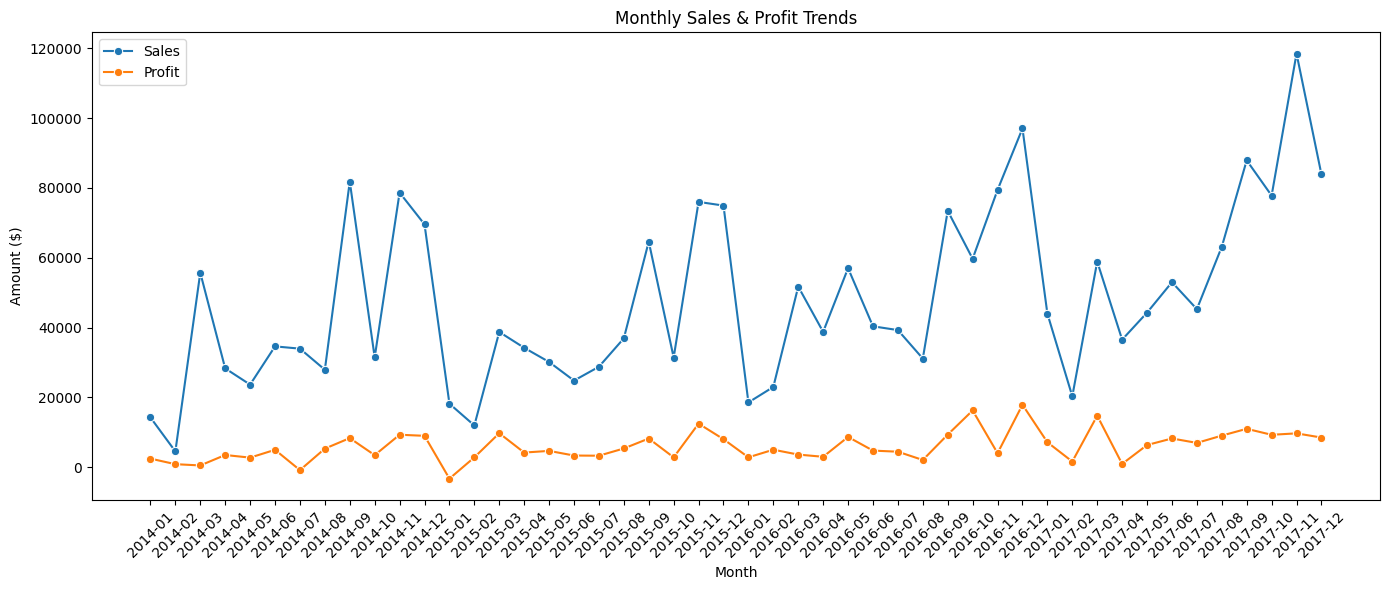

In [294]:
# Monthly Sales & Profit Trend (Line Plot)
plt.figure(figsize=(14,6))
sns.lineplot(x='Year-Month', y='Total_Sales', data=monthly_trends, label='Sales', marker='o')
sns.lineplot(x='Year-Month', y='Total_Profit', data=monthly_trends, label='Profit', marker='o')
plt.title("Monthly Sales & Profit Trends")
plt.ylabel("Amount ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

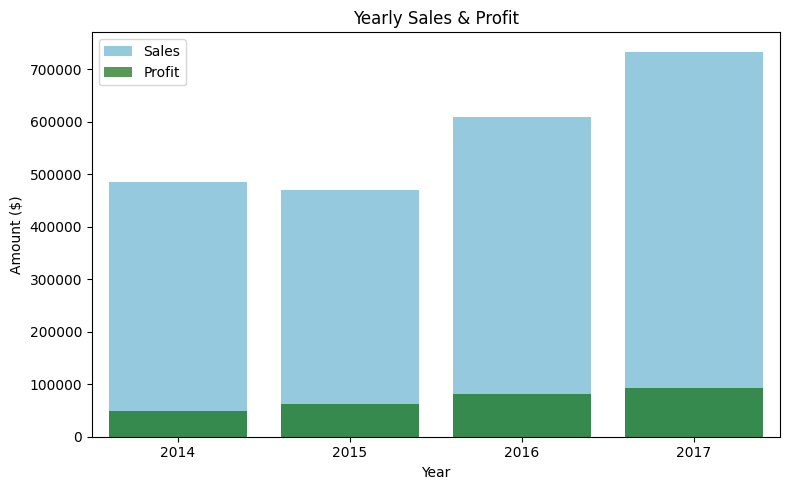

In [295]:
# Yearly Sales & Profit (Bar Chart)
plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Total_Sales', data=yearly_trends, color='skyblue', label='Sales')
sns.barplot(x='Year', y='Total_Profit', data=yearly_trends, color='green', alpha=0.7, label='Profit')
plt.title("Yearly Sales & Profit")
plt.ylabel("Amount ($)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

#**3.KPI Metrics**

In [303]:
total_sales = df['Sales'].sum()

display(HTML("<h3 style='color: red;'>Total Sales Summary</h3>"))
print(f"Total Sales: ${total_sales / 1_000_000:.2f} Million")
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100
print(f"Total Profit: ${total_profit:.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")
total_orders = df['Order ID'].nunique()
avg_order_value = total_sales / total_orders
print(f"Average Order Value (AOV): ${avg_order_value:.2f}")


Total Sales: $2.30 Million
Total Profit: $286397.02
Profit Margin: 12.47%
Average Order Value (AOV): $458.61


Acquired Customers (First-time Buyers): 5
Retained Customers (Repeat Buyers): 788


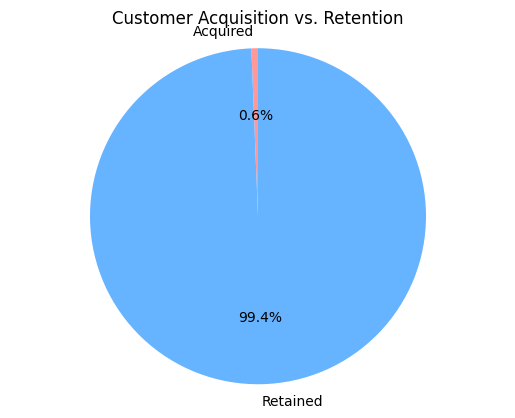

In [304]:
#Customer Acquisition vs Retention

customer_counts = df['Customer ID'].value_counts()
acquired_customers = (customer_counts == 1).sum()
retained_customers = (customer_counts > 1).sum()

print(f"Acquired Customers (First-time Buyers): {acquired_customers}")
print(f"Retained Customers (Repeat Buyers): {retained_customers}")

# Optional pie chart
import matplotlib.pyplot as plt

plt.pie(
    [acquired_customers, retained_customers],
    labels=['Acquired', 'Retained'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff']
)
plt.title('Customer Acquisition vs. Retention')
plt.axis('equal')
plt.show()


In [305]:
# Products
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values()
print("Top 5 Loss Products:\n", product_profit.head(5))
print("\nTop 5 Profit Products:\n", product_profit.tail(5).sort_values(ascending=False))

# Categories
category_profit = df.groupby('Category')['Profit'].sum().sort_values()
print("\nTop Category by Loss:\n", category_profit.head(1))
print("\nTop Category by Profit:\n", category_profit.tail(1))


Top 5 Loss Products:
 Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bush Advantage Collection Racetrack Conference Table       -1934.3976
Name: Profit, dtype: float64

Top 5 Profit Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

Top Category by Loss:
 Category
Furniture    18451.2728
Name: Profit

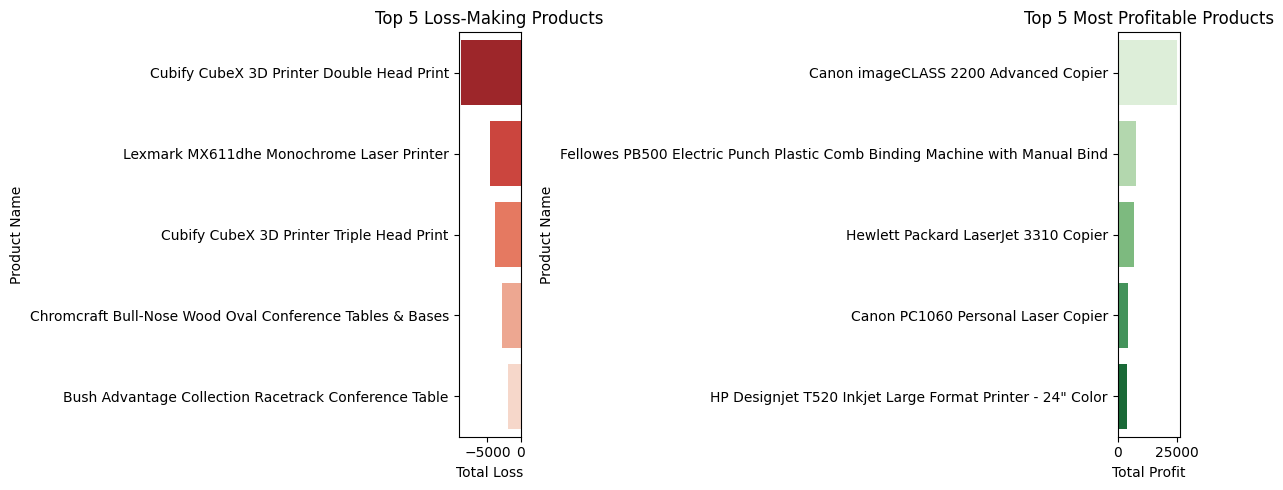

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
top_5_loss_products = product_profit.head(5)
top_5_profit_products = product_profit.tail(5).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))

# Loss Products
plt.subplot(1, 2, 1)
sns.barplot(x=top_5_loss_products.values, y=top_5_loss_products.index, palette='Reds_r')
plt.title("Top 5 Loss-Making Products")
plt.xlabel("Total Loss")
plt.ylabel("Product Name")

# Profit Products
plt.subplot(1, 2, 2)
sns.barplot(x=top_5_profit_products.values, y=top_5_profit_products.index, palette='Greens')
plt.title("Top 5 Most Profitable Products")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")

plt.tight_layout()
plt.show()


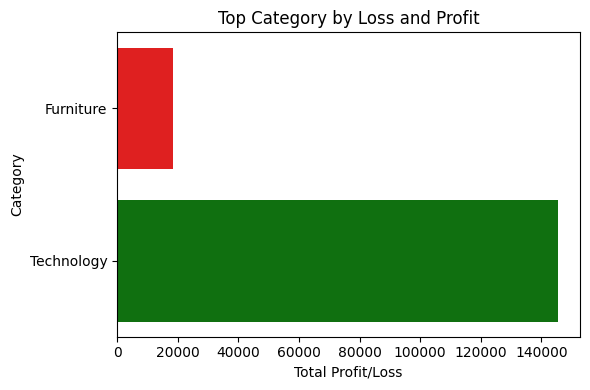

In [307]:
# Prepare category data
top_loss_category = category_profit.head(1)
top_profit_category = category_profit.tail(1)

# Combine for plotting
category_compare = pd.concat([top_loss_category, top_profit_category])

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=category_compare.values, y=category_compare.index, palette=['red', 'green'])
plt.title("Top Category by Loss and Profit")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Category")
plt.tight_layout()
plt.show()
